# Data Collection

Forecasting rise and fall in the daily gold rates can help investors to decide when to buy (or sell) the commodity.

This dataset contains historical data on Gold prices, covering the time series of daily gold prices over 5 years from 2 April 2000 to 2 April 2025. This dataset is extracted from Yahoo Finance using yfinance python library on 2 April 2025 at 14.16 CEST.

Each record typically includes the following columns:

- Date: The trading date for each entry, in the format.
  
- Open: The gold price of gold at the start of the trading day.
  
- High: The highest gold price reached during the trading day.
  
- Low: The lowest gold price during the trading day.
  
- Close: The raw closing price of gold at the end of each trading day.
  
- Volume: The total number of shares traded during the trading day.
  
- Dividends: The amount of dividend paid per share on that date (if any).
  
- Stock Splits: The ratio of stock splits occurring on that date.


The challenge of this project is to accurately predict the future adjusted closing price of Gold across a given period of time in the future.

In [ ]:
pip install yfinance


In [ ]:
import yfinance as yf
import pandas as pd


In [ ]:
# Define the ticker symbol for Gold Futures
gold = yf.Ticker("GC=F")

# Fetch historical gold prices for the last 5 years
gold_data = gold.history(period="5y")

# Display the first few rows
print(gold_data.head())


                                  Open         High          Low        Close  \
Date                                                                            
2020-04-02 00:00:00-04:00  1590.900024  1631.199951  1586.000000  1625.699951   
2020-04-03 00:00:00-04:00  1624.500000  1636.000000  1619.800049  1633.699951   
2020-04-06 00:00:00-04:00  1629.099976  1696.699951  1625.900024  1677.000000   
2020-04-07 00:00:00-04:00  1695.699951  1724.400024  1658.000000  1664.800049   
2020-04-08 00:00:00-04:00  1669.699951  1677.000000  1662.500000  1665.400024   

                           Volume  Dividends  Stock Splits  
Date                                                        
2020-04-02 00:00:00-04:00    1294        0.0           0.0  
2020-04-03 00:00:00-04:00     643        0.0           0.0  
2020-04-06 00:00:00-04:00    1063        0.0           0.0  
2020-04-07 00:00:00-04:00    1144        0.0           0.0  
2020-04-08 00:00:00-04:00     747        0.0           0.0  


In [ ]:
gold_data.to_csv("gold_price_5years_USD.csv")
print("Gold price data saved as gold_price_5years_USD.csv")


Gold price data saved as gold_price_5years_USD.csv


In [ ]:
from google.colab import files
files.download("gold_price_5years_USD.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import os   # OS module
import matplotlib.pyplot as plt   # Data Visualization
import seaborn as sns   # Data Visualization
import datetime as dt   # Handling dates and times

from scipy.stats import skew, kurtosis  # Measure skew and kurtosis
from sklearn.model_selection import train_test_split # Split dataset
from sklearn.ensemble import RandomForestRegressor # RandomForestRegressor model
from sklearn.linear_model import LinearRegression # LinearRegression model
from xgboost import XGBRegressor # XGBRegressor model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Evaluate model performance
from sklearn.model_selection import cross_val_score # Evaluate model using cross validation

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset:
df_gold = pd.read_csv('gold_price_5years_USD.csv')
df_gold

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-04-02 00:00:00-04:00,1590.900024,1631.199951,1586.000000,1625.699951,1294,0.0,0.0
1,2020-04-03 00:00:00-04:00,1624.500000,1636.000000,1619.800049,1633.699951,643,0.0,0.0
2,2020-04-06 00:00:00-04:00,1629.099976,1696.699951,1625.900024,1677.000000,1063,0.0,0.0
3,2020-04-07 00:00:00-04:00,1695.699951,1724.400024,1658.000000,1664.800049,1144,0.0,0.0
4,2020-04-08 00:00:00-04:00,1669.699951,1677.000000,1662.500000,1665.400024,747,0.0,0.0
...,...,...,...,...,...,...,...,...
1253,2025-03-27 00:00:00-04:00,3025.500000,3065.000000,3025.500000,3060.199951,124359,0.0,0.0
1254,2025-03-28 00:00:00-04:00,3069.699951,3094.899902,3066.800049,3086.500000,31206,0.0,0.0
1255,2025-03-31 00:00:00-04:00,3091.000000,3132.500000,3086.000000,3122.800049,3438,0.0,0.0
1256,2025-04-01 00:00:00-04:00,3129.699951,3149.500000,3104.000000,3118.899902,3438,0.0,0.0


In [3]:
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1258 non-null   object 
 1   Open          1258 non-null   float64
 2   High          1258 non-null   float64
 3   Low           1258 non-null   float64
 4   Close         1258 non-null   float64
 5   Volume        1258 non-null   int64  
 6   Dividends     1258 non-null   float64
 7   Stock Splits  1258 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 78.8+ KB


- No missing value
- The data type for 'Date' column is incorrect, so it needs to be changed.
- Dividens and Stock splits contain 1258 data, but all value are 0 (zero) --> needs to removed due to irrelevant information.

# Data Cleaning

In [4]:
df_gold

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-04-02 00:00:00-04:00,1590.900024,1631.199951,1586.000000,1625.699951,1294,0.0,0.0
1,2020-04-03 00:00:00-04:00,1624.500000,1636.000000,1619.800049,1633.699951,643,0.0,0.0
2,2020-04-06 00:00:00-04:00,1629.099976,1696.699951,1625.900024,1677.000000,1063,0.0,0.0
3,2020-04-07 00:00:00-04:00,1695.699951,1724.400024,1658.000000,1664.800049,1144,0.0,0.0
4,2020-04-08 00:00:00-04:00,1669.699951,1677.000000,1662.500000,1665.400024,747,0.0,0.0
...,...,...,...,...,...,...,...,...
1253,2025-03-27 00:00:00-04:00,3025.500000,3065.000000,3025.500000,3060.199951,124359,0.0,0.0
1254,2025-03-28 00:00:00-04:00,3069.699951,3094.899902,3066.800049,3086.500000,31206,0.0,0.0
1255,2025-03-31 00:00:00-04:00,3091.000000,3132.500000,3086.000000,3122.800049,3438,0.0,0.0
1256,2025-04-01 00:00:00-04:00,3129.699951,3149.500000,3104.000000,3118.899902,3438,0.0,0.0


## Missing Value

In [5]:
df_gold.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

NO missing value

## Convert Date Format

In [6]:
# Convert the date type from object to datetime and keep only YYYY-MM-DD
df_gold['Date'] = pd.to_datetime(df_gold['Date'], utc=True)
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          1258 non-null   datetime64[ns, UTC]
 1   Open          1258 non-null   float64            
 2   High          1258 non-null   float64            
 3   Low           1258 non-null   float64            
 4   Close         1258 non-null   float64            
 5   Volume        1258 non-null   int64              
 6   Dividends     1258 non-null   float64            
 7   Stock Splits  1258 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 78.8 KB


- Date type has been converted to datetime64 format


## Remove Irrelevant Columns

In [7]:
# check unique value dividens:
df_gold['Dividends'].unique()

array([0.])

In [8]:
# check unique value of stock splits:
df_gold['Stock Splits'].unique()

array([0.])

**The value for dividens and stock splits are 0 (zero), so they will be deleted because irrelevant for further processing steps**

In [9]:
# Delete columns of 'Dividens' and 'Stock Splits":
df_gold = df_gold.drop(columns=['Dividends', 'Stock Splits'])
df_gold

,Date,Open,High,Low,Close,Volume
0,2020-04-02 04:00:00+00:00,1590.900024,1631.199951,1586.000000,1625.699951,1294
1,2020-04-03 04:00:00+00:00,1624.500000,1636.000000,1619.800049,1633.699951,643
2,2020-04-06 04:00:00+00:00,1629.099976,1696.699951,1625.900024,1677.000000,1063
3,2020-04-07 04:00:00+00:00,1695.699951,1724.400024,1658.000000,1664.800049,1144
4,2020-04-08 04:00:00+00:00,1669.699951,1677.000000,1662.500000,1665.400024,747
...,...,...,...,...,...,...
1253,2025-03-27 04:00:00+00:00,3025.500000,3065.000000,3025.500000,3060.199951,124359
1254,2025-03-28 04:00:00+00:00,3069.699951,3094.899902,3066.800049,3086.500000,31206
1255,2025-03-31 04:00:00+00:00,3091.000000,3132.500000,3086.000000,3122.800049,3438
1256,2025-04-01 04:00:00+00:00,3129.699951,3149.500000,3104.000000,3118.899902,3438


# Exploratory Data Analysis (EDA)

## Data Understanding

In [10]:
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    1258 non-null   datetime64[ns, UTC]
 1   Open    1258 non-null   float64            
 2   High    1258 non-null   float64            
 3   Low     1258 non-null   float64            
 4   Close   1258 non-null   float64            
 5   Volume  1258 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 59.1 KB


- Dataset has 1258 entries and 8 columns
- There is no missing value

## Descriptive Statistics

In [11]:
# Descriptive Statistic -> Understand the distribution of gold prices:
df_gold.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,2004.843561,2014.969556,1995.417328,2005.480681,4382.942766
std,323.351602,325.234426,321.922706,324.060353,23153.687024
min,1590.900024,1623.300049,1586.000000,1623.300049,0.000000
25%,1793.599976,1802.350037,1785.899963,1795.199982,81.250000
50%,1897.150024,1907.349976,1885.700012,1898.349976,253.500000
75%,2030.899994,2037.300049,2021.524963,2027.274994,713.000000
max,3147.500000,3167.000000,3135.699951,3155.800049,209835.000000


The average minimum close price is 1623 USD and the average maximum close price is 3155 USD, which is higher than the open price. While the average close value is almost the same as the average open value, which is around 2005 USD.


## Data Visualization

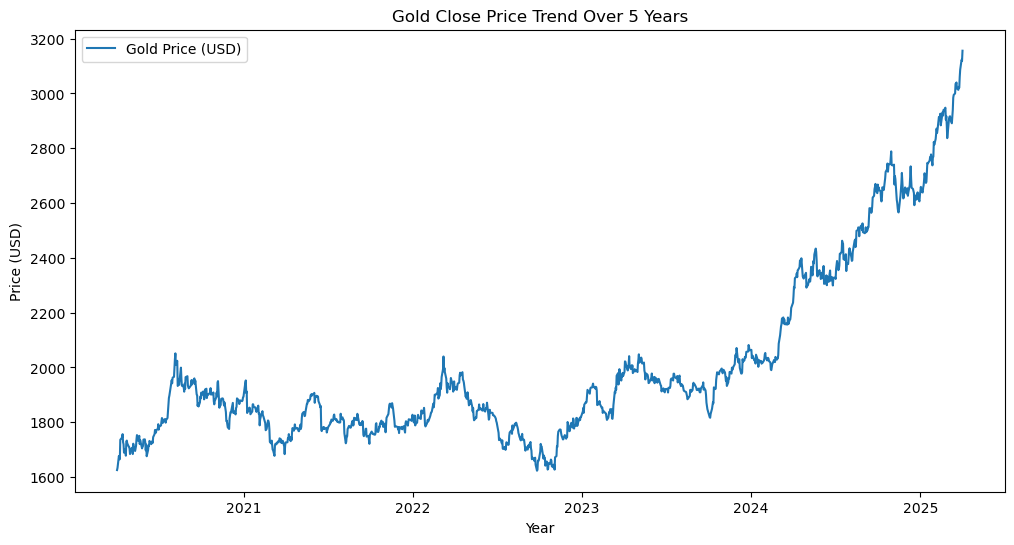

In [12]:
# Visualizing gold price trends:
plt.figure(figsize=(12,6))
plt.plot(df_gold['Date'], df_gold['Close'], label="Gold Price (USD)")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.title("Gold Close Price Trend Over 5 Years")
plt.legend()
plt.show()


**KEY INSIGHTS**

- Gold prices tend to fluctuate from 2020 to 2023, and increase significantly since 2024.
  
- Gold price movements are influenced by a mix of global economic, political and financial factors, and fluctuate between 2020 and 2023, followed by a significant increase in 2024.


***1. 2020 - 2023: Gold Price Fluctuations***

- COVID-19 Pandemic (2020 - 2021) : Uncertainty and fear prompted investors to buy gold as a safe haven. Prices soared in 2020, hitting an all-time high around August. However, prices have declined in 2021 as vaccines roll out and economies recover.

- Central Bank Interest Rate Hikes (2022 - 2023) : In response to high inflation, central banks (most notably the US Federal Reserve) have raised interest rates. This has led to higher bond yields and lower demand for gold. As a result, gold prices have cooled or fluctuated.

- Geopolitical Tensions : Events such as the Russia-Ukraine war (2022) can also cause temporary spikes in gold prices due to investor fear.

- Strong US Dollar: Gold is priced in USD. When the dollar strengthens, gold becomes more expensive in other currencies = demand will fall. A stronger dollar in parts of 2022–2023 could put downward pressure on gold prices.


***2. Since 2024: Significant Gold Price Gains***

- Slowing Global Growth and recession fears: Slowing Global Growth, uncertain market conditions and Fears of Recession are driving investors back to gold, especially in developed countries.

- Central Banks Buy Gold: Many countries (notably China, India, and Russia) are increasing their gold reserves to reduce their dependence on the US dollar. This strong demand from central banks is driving prices up.

- Inflation Hedge: Gold is a traditional hedge against inflation. Even if inflation eases, lingering fears of a return of inflation could drive investors to gold.

- Weaker Dollar: A weaker USD in 2024 makes gold cheaper for non-US buyers, boosting demand and pushing up prices.

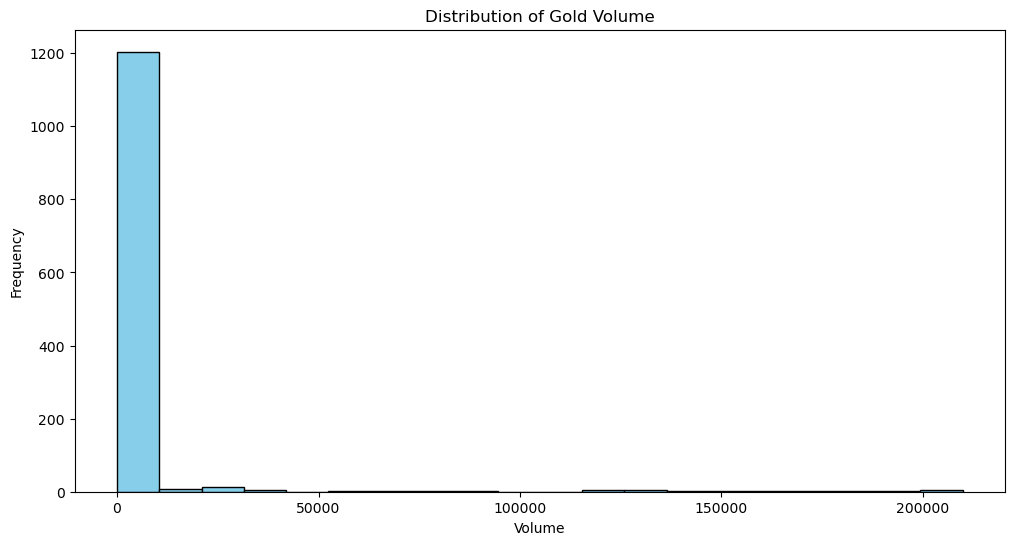

In [13]:
# Visualization volume distribution:
plt.figure(figsize=(12,6))
plt.hist(df_gold['Volume'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.title("Distribution of Gold Volume")
plt.show()

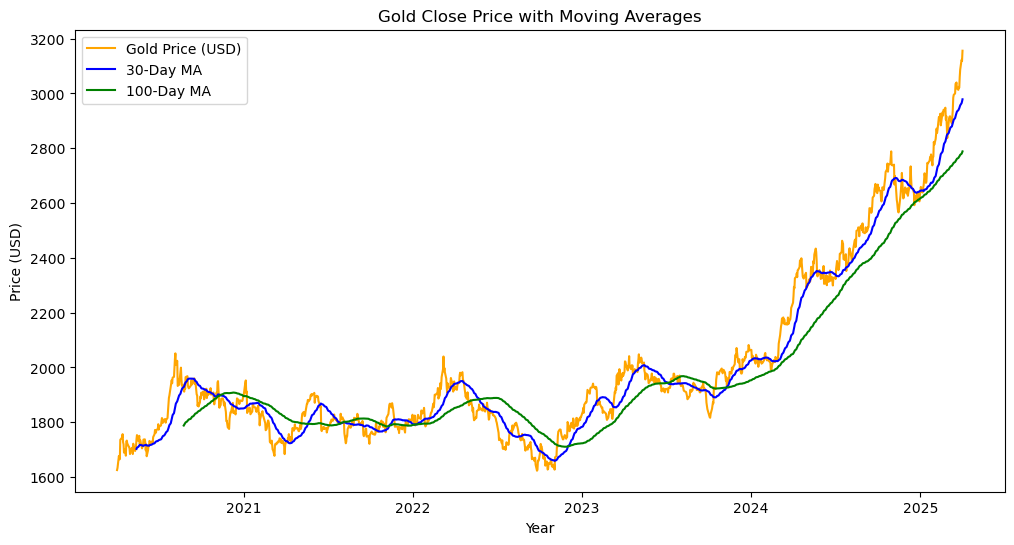

In [14]:
# Close price with 30 and 100-day moving average:
plt.figure(figsize=(12,6))
plt.plot(df_gold['Date'], df_gold['Close'], label="Gold Price (USD)", color='orange')
plt.plot(df_gold['Date'], df_gold['Close'].rolling(window=30).mean(), label="30-Day MA", color='blue')
plt.plot(df_gold['Date'], df_gold['Close'].rolling(window=100).mean(), label="100-Day MA", color='green')
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.title("Gold Close Price with Moving Averages")
plt.legend()
plt.show()

**KEY INSIGHTS**

- Gold Price Trend: Gold prices are relatively sideways (flat) from 2020 - 2023, and starting to rise sharply from early 2024 to 2025.

- Golden Cross / Death Cross (MA Crossing): When MA-30 cuts MA-100 from bottom to top → bullish signal (price is expected to rise). Around mid-2023 to 2024, MA-30 was seen rising and crossing MA-100 → early signal of an uptrend.

- Long-Term Trend Support: MA-100 has continued to rise since 2024 → confirmation that the uptrend is strong and consistent.

In [15]:
!pip install mplfinance

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Obtaining dependency information for mplfinance from https://files.pythonhosted.org/packages/d7/d9/31c436ea7673c21a5bf3fc747bc7f63377582dfe845c3004d3e46f9deee0/mplfinance-0.12.10b0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.4 MB/s eta 0:00:00.5 MB/s eta 0:00:01


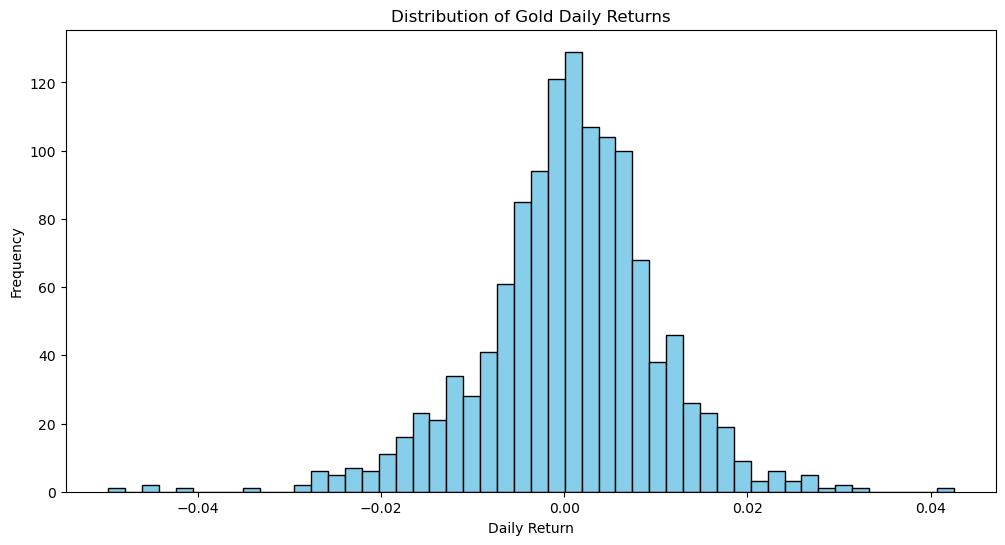

In [16]:
# Daily return distribution:
df_gold['Daily Return'] = df_gold['Close'].pct_change()
plt.figure(figsize=(12,6))
plt.hist(df_gold['Daily Return'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.title("Distribution of Gold Daily Returns")
plt.show()

Daily Return Histogram Shows the distribution of daily returns (%) of gold prices.

**Insight:**

- The distribution is close to normal (bell-shaped), but there is a slight skew and some outliers (tails) on the left and right, meaning there are days with extreme movements.
  
- The peak is around 0% return, meaning the gold price is mostly stable on a daily basis. But there is still a risk of a big spike.
  
- This Daily Return information is very useful for risk analysis, prediction, and investment/trading decision making.

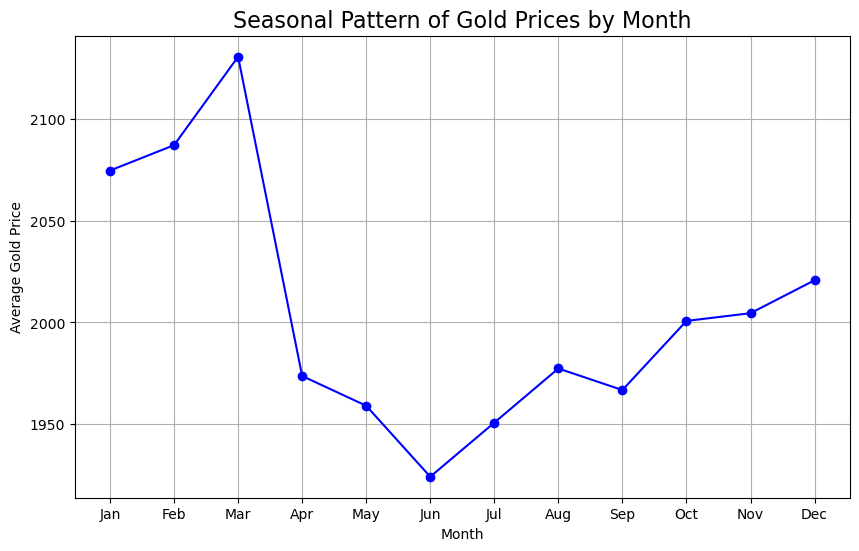

In [17]:
df_gold['day'] = df_gold['Date'].dt.day
df_gold['month'] = df_gold['Date'].dt.month
df_gold['year'] = df_gold['Date'].dt.year

# Average gold price per month
monthly_avg = df_gold.groupby('month')['Close'].mean()

#Visualization of annual patterns
plt.figure(figsize=(10,6))
plt.plot(monthly_avg, marker='o', linestyle='-', color='b')
plt.title('Seasonal Pattern of Gold Prices by Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average Gold Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

The chart shows the Average Gold Price per Month (all years combined).

**Key Insights:**

- Q1 (Jan - Mar) often experiences an increase in price which may be caused by early year uncertainty and investment demand, where the highest gold price tends to be in March.
  
- Q2 (Apr - Jun) is relatively lower → investors may switch to other assets.
  
- Q3 and Q4 (Jul - Dec) After June, the price starts to rise slowly again until the end of the year. This indicates a recovery and price rally → it could be due to end-of-year speculation, central bank purchases, or global tensions.

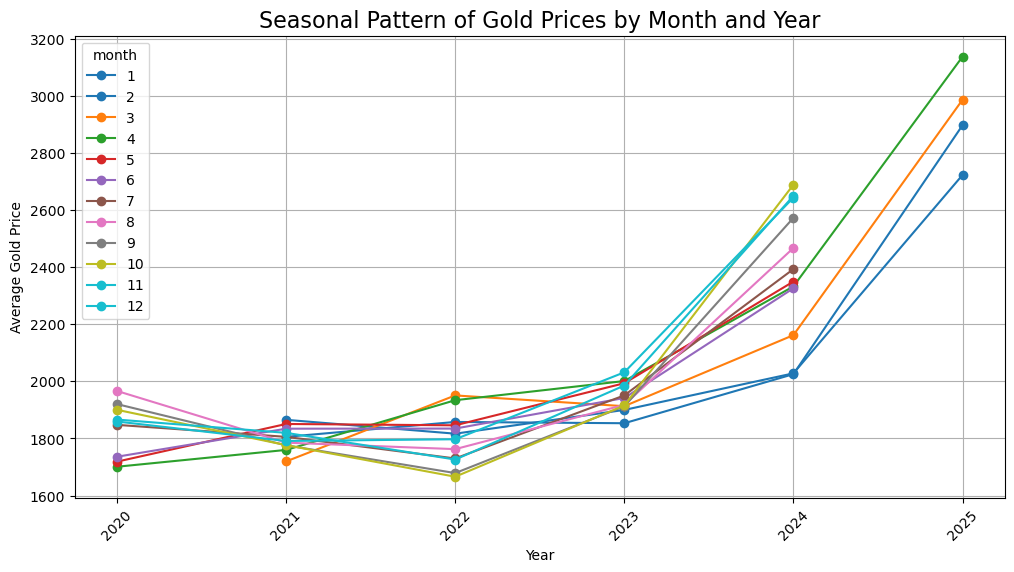

In [18]:
# Average gold price per month for each year
monthly_yearly_avg = df_gold.groupby(['year', 'month'])['Close'].mean().unstack()

# Visualization of gold price patterns per month for several years
monthly_yearly_avg.plot(figsize=(12,6), marker='o', linestyle='-', cmap='tab10')
plt.title('Seasonal Pattern of Gold Prices by Month and Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Gold Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The chart shows the Seasonal Pattern of Gold Prices by Month & Year. Each line represents a specific month (1 = Jan, 12 = Dec) from 2020 - 2024.

**Key Insights:**

- 2020 - 2022 is flatter, but still has a slight uptrend towards the end of the year.
  
- Prices tend to be low in the middle of the year (May - July) almost every year.
  
- 2023 & 2024 show significant uptrends, in line with fundamental factors (such as dollar weakness & central bank buying).
  
- Gold prices in 2024 rise sharply, especially in March - April.

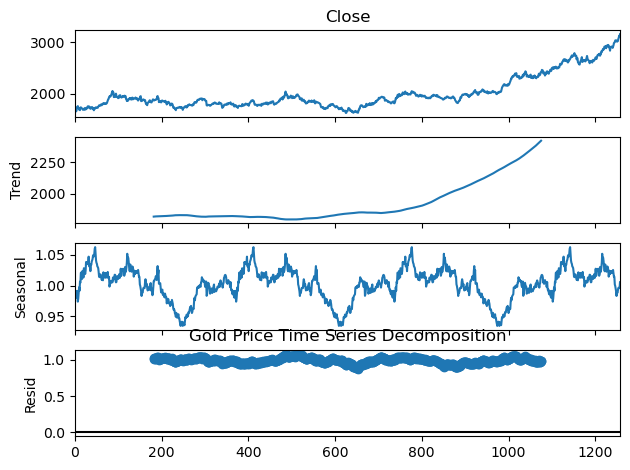

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Make sure the data is sorted by date.
df_gold = df_gold.sort_values('Date')

# Decompose time series
result = seasonal_decompose(df_gold['Close'], model='multiplicative', period=365)  # For example, annual period
result.plot()
plt.title("Gold Price Time Series Decomposition")
plt.show()

The graph above shows the results of the time series decomposition of gold prices (Close). This can help us understand the main components in time series data.

Explanation of Each Component:
- Original Series (Close): displays the actual gold price over time, where it can be seen that there is a significant upward trend from mid-2022 to 2024.

- Trend: Shows the long-term direction of gold prices, where it looks stable from the beginning to the middle, then starts to rise sharply at the end, indicating a significant increase in the last 1-2 years.

- The Seasonal graph shows a fairly consistent annual repeating pattern, indicating a seasonal cycle in gold prices.

- Residual (Noise / Remainder) shows noise that is quite small and stable, meaning that the decomposition model is quite successful in separating the main pattern from the noise → the ARIMA model is likely to be suitable for application to this data.

## Correlation between numerical variables

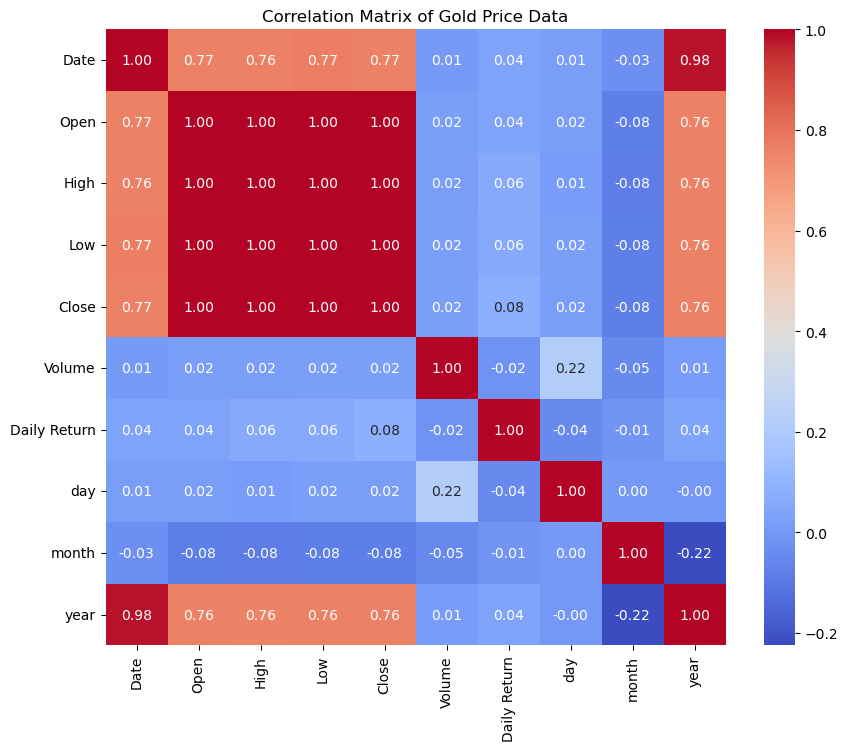

In [20]:
# Correlation matrix between all numerical variables:
correlation_matrix = df_gold.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Gold Price Data")
plt.show()

**Insights from the heatmap:**

- High Correlation between Open, High, Low, Close. The value = 1.00 which means very redundant to each other.
  
- Volume & Daily Return have low correlation (< 0.1) to price (Close), meaning that volume may not be very important for direct price prediction.
  
- Time feature (day, month, year): year is highly correlated with price (0.76 - 0.98), may be because price increases every year. While month has a slight negative correlation (−0.08) which may indicate a slight seasonal pattern.

**Key Insights:**

- The outliers (black circles above the whiskers) represent gold price value that are significantly higher than the typical range.
  
- The concentration of outliers at the top suggests that there were several instances where gold price spiked unexpectedly.
  
- These outliers is valid and reflect important phenomena (spikes in gold prices that actually occurred in several periods), then outlier handling is not necessary.


**Possible Reason for those Outliers are:**

- Market fluctuation, where demand and supply suddenly change.
  
- Economic factor: major financial crises or inflation concerns.
  
- Geopolitical tensions caused by war or political instability can drive prices up.
  
- Speculation and Trading Volume: High trading volumes leading to sudden price jumps.

# Data Preprocessing

In [21]:
# copy the dataframe:
df = df_gold.copy()

In [22]:
# Set date to index:
df = df.set_index('Date')

## Lag Features

In [23]:
# Lag features (for example, the gold price from the previous day):
df['Close_Lag_1'] = df['Close'].shift(1)
df['Close_Lag_7'] = df['Close'].shift(7)
df['Close_Lag_30'] = df['Close'].shift(30)

## Moving Average (MA)

In [24]:
# Moving Averages:
df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['MA_100'] = df['Close'].rolling(window=100).mean()

## Handling NAN due to Lag features and MA

In [25]:
# Handle NaN - delete all rows that do not have complete data:
df.dropna(inplace=True)

In [26]:
df

,Open,High,Low,Close,Volume,Daily Return,day,month,year,Close_Lag_1,Close_Lag_7,Close_Lag_30,MA_7,MA_30,MA_100
Date,,,,,,,,,,,,,,,
2020-08-24 04:00:00+00:00,1930.199951,1940.000000,1922.199951,1927.699951,85,-0.003567,24,8,2020,1934.599976,1956.699951,1811.000000,1953.742850,1928.559998,1788.111000
2020-08-25 04:00:00+00:00,1927.500000,1928.500000,1911.800049,1911.800049,176,-0.008248,25,8,2020,1927.699951,1937.000000,1810.599976,1950.142857,1931.933333,1790.972001
2020-08-26 04:00:00+00:00,1909.699951,1950.800049,1909.699951,1940.699951,287,0.015117,26,8,2020,1911.800049,1985.000000,1811.400024,1943.814279,1936.243331,1794.042001
2020-08-27 04:00:00+00:00,1948.900024,1972.500000,1921.599976,1921.599976,2303,-0.009842,27,8,2020,1940.699951,1999.400024,1798.699951,1932.699986,1940.339998,1796.488000
2020-08-28 04:00:00+00:00,1927.099976,1971.300049,1922.500000,1964.599976,778,0.022377,28,8,2020,1921.599976,1958.699951,1808.300049,1933.542847,1945.549996,1799.486000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-27 04:00:00+00:00,3025.500000,3065.000000,3025.500000,3060.199951,124359,0.013009,27,3,2025,3020.899902,3035.100098,2909.000000,3030.285679,2951.086670,2772.439006
2025-03-28 04:00:00+00:00,3069.699951,3094.899902,3066.800049,3086.500000,31206,0.008594,28,3,2025,3060.199951,3035.899902,2925.899902,3037.514265,2956.440007,2775.918005
2025-03-31 04:00:00+00:00,3091.000000,3132.500000,3086.000000,3122.800049,3438,0.011761,31,3,2025,3086.500000,3040.000000,2883.600098,3049.342843,2964.413338,2779.785005


After all rows containing NaN are removed, the dataset changes, originally from 2 April 2020 to 2 April 2025, to now being from 24 August 2020 to 2 Apri 2025 --> this affects how we decide the split date for dividing the training and test sets. --> date split = 4 Juli 2024

# Split the Dataset

In [27]:
# Time-based train-test split
train = df[df.index < '2024-07-04']
test = df[df.index >= '2024-07-04']

In [28]:
# Split data to features (X) and target (Y):
X = df[['Close_Lag_1', 'Close_Lag_7', 'Close_Lag_30', 'MA_7', 'MA_30', 'MA_100']]
y = df['Close']

X_train = train[X.columns]
y_train = train['Close']
X_test = test[X.columns]
y_test = test['Close']

# Modeling

## Model Training

In [29]:
# Define Models

models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

results = {}

# Fit models and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

## Model Evaluation

In [30]:
# Print evaluation results:
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Model: LinearRegression
MAE: 19.1290
RMSE: 24.3454
R2: 0.9829

Model: RandomForest
MAE: 293.2169
RMSE: 345.4241
R2: -2.4443

Model: XGBoost
MAE: 345.7097
RMSE: 395.5898
R2: -3.5174


- The linear regression model has the lowest MAE and RMSE, with an excellent R² value of 0.9829. This indicates that the model fits the data very well and makes accurate predictions.
- The negative R² on Random Forest and XGBoost indicates that these two models failed to learn useful patterns from the data, even worse than using a simple prediction approach.
- Best performing model: Linear Regression seems to perform the best based on the MAE, RMSE, and R² scores, indicating that it is the most accurate for this particular dataset.

In [31]:
# Cross validation for linier regression:
cv_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=5, scoring='r2')

print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R²: {np.mean(cv_scores):.4f}")

Cross-Validation R² Scores: [0.92340245 0.88591047 0.97038257 0.93721681 0.98492095]
Mean R²: 0.9404


# Gold Price prediction using Linier Regression

In [32]:
# Define final_model by assigning the best performing model:
final_model = models['LinearRegression']

# Copy final df for rolling
rolling_df = df.copy()
future_dates = pd.date_range(start='2025-04-03', end='2026-12-31', freq='B')
predictions = []

for date in future_dates:
    # Create a feature for this date from the latest data
    last_data = rolling_df.copy()

    # Create a prediction row
    row = {
        'Close_Lag_1': last_data['Close'].iloc[-1],
        'Close_Lag_7': last_data['Close'].iloc[-7] if len(last_data) >= 7 else np.nan,
        'Close_Lag_30': last_data['Close'].iloc[-30] if len(last_data) >= 30 else np.nan,
        'Close_Lag_365': last_data['Close'].iloc[-365] if len(last_data) >= 365 else np.nan,
        'MA_7': last_data['Close'].tail(7).mean(),
        'MA_30': last_data['Close'].tail(30).mean(),
        'MA_100': last_data['Close'].tail(100).mean(),
        'MA_365': last_data['Close'].tail(365).mean(),
        'Open': last_data['Open'].iloc[-1],
        'High': last_data['High'].iloc[-1],
        'Low': last_data['Low'].iloc[-1],
        'Volume': last_data['Volume'].iloc[-1],
        'Daily Return': last_data['Daily Return'].iloc[-1],
        'trend': len(last_data),
        'day': date.day,
        'month': date.month,
        'year': date.year,
        'day_of_week': date.dayofweek,
    }

    # Convert row to DataFrame and ensure it matches the feature columns of X_train
    X_today = pd.DataFrame([row], columns=X_train.columns).fillna(0)

    # Predict the price using the final model
    y_pred = final_model.predict(X_today)[0]

    # Store prediction
    predictions.append({'Date': date, 'Close': y_pred})

    # Add prediction to rolling_df for the next iteration
    new_row = {
        'Close': y_pred,
        'Open': row['Open'], 'High': row['High'], 'Low': row['Low'], 'Volume': row['Volume'],
        'Daily Return': row['Daily Return'],
    }
    new_df = pd.DataFrame([new_row], index=[date])
    rolling_df = pd.concat([rolling_df, new_df])

# Create DataFrame of predictions
future_pred_df = pd.DataFrame(predictions).set_index('Date')


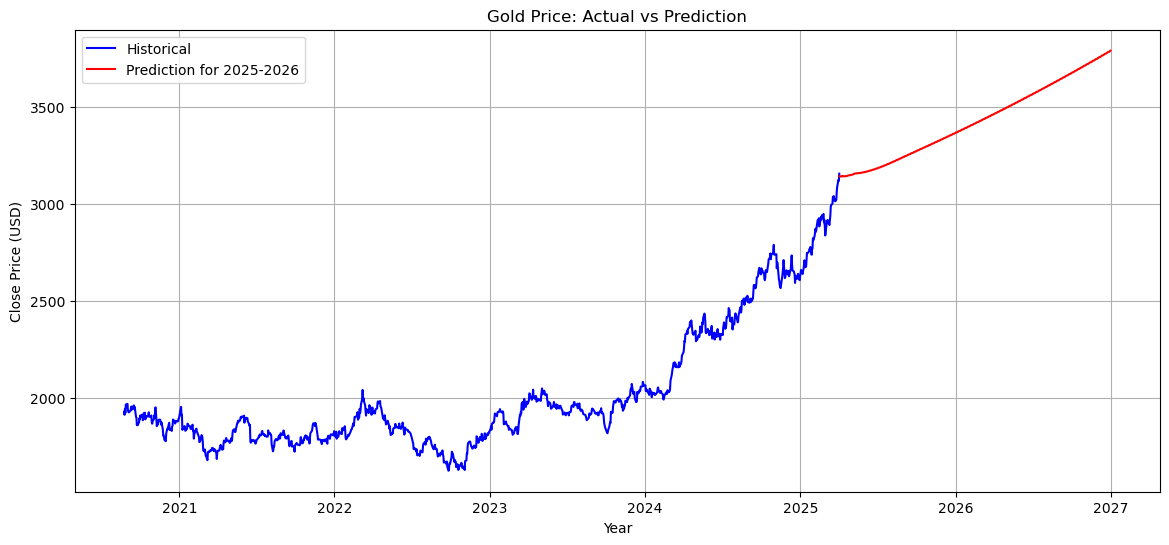

In [33]:
# Visualization:
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Historical', color='blue')
plt.plot(future_pred_df['Close'], label='Prediction for 2025-2026', color='red')
plt.title('Gold Price: Actual vs Prediction')
plt.xlabel('Year')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

**Gold Price Forecast Analysis – Insight Summary**

- Historical gold price data from mid-2021 to early 2025 shows a strong and consistent upward trend, particularly accelerating from mid-2023 onwards. This reflects a bullish phase that is potentially influenced by macroeconomic factors such as inflation, geopolitical tensions, or shifts in global monetary policy.
  
- The forecasted values, generated using a Linear Regression model, continue this upward momentum, projecting a sharp and sustained increase in gold prices through mid-to-late 2025. However, the forecast appears overly optimistic and does not reflect realistic market behavior, as it does not include price corrections or volatility — elements that are common in financial markets. This is due to the simplicity of the Linear Regression approach and the model’s reliance only on historical gold price data (Closing values ​​and lags/derived moving averages). Most importantly, no external economic indicators such as crude oil prices, USD index, interest rates, or inflation data are included in the model. As a result, the forecast may not adequately reflect real-world dynamics or macroeconomic risks.
  
- To improve forecast accuracy and realism, combining time series models (e.g., ARIMA, Prophet, LSTM) and integrating macroeconomic indicators is highly recommended.